## Library

In [18]:
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
from sklearn.neighbors import NearestNeighbors

## Load the saved pickle data

In [19]:
# # Generate random dots
# dots = np.random.rand(3, 10) * 100 # Shape ndot * ndim
#X_C_I_list.pkl
#X_C_I_DinoRing_list.pkl
with open('X_C_I_DinoRing_list.pkl', 'rb') as handle:
    X_C_I_list = pkl.load(handle)
    
X_list = X_C_I_list[0]

X = np.vstack(X_list).squeeze(axis = 2).T


X = X.T
# X is now (n, 3)

X.shape

(32268, 3)

# Apply Kernel K-Means Algorithm

In [20]:
def plot_3d(X):
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.scatter3D(X[:,0],X[:,1],X[:,2])
    plt.show()
    
    pass

In [21]:
def kmeans(X,k, threshold, ismean=True):
    print('Starting K-MEANS')
    # K means on euclidean DISTANCE
    if ismean:
        mean_center = np.mean(X, axis = 0)
    else:
        mean_center = np.median(X, axis = 0)
        
    dist_vec = np.linalg.norm(X - mean_center, axis = 1)
    # Assign k clusters
    cluster_assignments = KMeans(n_clusters=k, random_state=0).fit_predict(dist_vec[:,None])
    
    X_clean_list = []
    for i in range(k):

        X_k = X[np.where(cluster_assignments == i)]

        # Keep points that have at least threshold amount of points
        if len(X_k) >= threshold:
            X_clean_list.append(X_k)

    # Rebuild new points after removing 
    X_clean = np.vstack(X_clean_list)
    print("Points lost: ", len(X) - len(X_clean))
    print("Points remaining:", len(X_clean))
    
    return X_clean

In [22]:
def gaussian(X, ismean=True, alpha = 0.05):
    print('Starting GAUSSIAN')
    if ismean:
        mean_vec = np.mean(X, axis = 0)
    else:
        mean_vec = np.median(X, axis = 0)
        
    cov_mat = np.cov(X, rowvar = 0)

    print('FIT MULTIVARIATE GAUSSIAN')
    p = multivariate_normal.cdf(X, mean = mean_vec, cov = cov_mat)

    X_clean = X[np.where((p > alpha) & (p < (1-alpha)))]
    print("Points lost:", len(X) - len(X_clean))
    print("Points remaining:", len(X_clean))
    
    return X_clean
    

In [35]:
def nearestn(X, n_neighbor, n_int = 1, threshold = 0.001):
    print('Starting NN')
    X_clean = X
    
    for i in range(n_int):
        print(i)
        n_before = len(X_clean)
        knc = NearestNeighbors(n_neighbors = n_neighbor)
        knc_fit = knc.fit(X_clean)
        neigh_dist, neigh_ind = knc_fit.kneighbors()
        print(min(neigh_dist),max(neigh_dist))
        X_clean = X_clean[np.where(neigh_dist < threshold)[0],:]

        n_after = len(X_clean)
        print("Points lost:", n_before - n_after)
    print("Points remaining:", len(X_clean))


    return X_clean



In [36]:
# X_clean = kmeans(X = X, k = k_kmeans, threshold = threshold_kmeans, ismean = ismean_kmeans)
# X_clean = nearestn(X = X, n_neighbor = n_neighbor, n_int = n_int, threshold = threshold_nn)
# X_clean = gaussian(X = X, ismean = ismean_gaussian)

In [37]:
# def kmeans_outlier_remover_and_plot(X, k, threshold, alpha = 0.05):
    
#     mean_center = np.mean(X, axis = 0)
#     dist_vec = np.linalg.norm(X - mean_center, axis = 1)
#     cluster_assignments = KMeans(n_clusters=k, random_state=0).fit_predict(dist_vec[:,None])
    
#     pts_lost = 0

#     X_clean_list = []
#     for i in range(k):

#         X_k = X[np.where(cluster_assignments == i)]


#         if len(X_k) >= threshold:
#             X_clean_list.append(X_k)
#         else:
#             pts_lost += len(X_k)

#     print(pts_lost)

#     X_clean = np.vstack(X_clean_list)
    
    
#     # GAUSSIAN
    
#     mean_vec = np.mean(X_clean, axis = 0)
#     # mean_vec = np.median(X, axis = 0)
#     cov_mat = np.cov(X_clean, rowvar = 0)
    
#     print('FIT MODEL')
#     p = multivariate_normal.cdf(X_clean, mean = mean_vec, cov = cov_mat)

#     print(X_clean.shape)
#     X_clean = X_clean[np.where((p > alpha) & (p < (1-alpha)))]
#     print(X_clean.shape)
    
    
#     fig = plt.figure()
#     ax = plt.axes(projection='3d')

#     ax.scatter3D(X_clean[:,0],X_clean[:,1],X_clean[:,2])
#     plt.show()
    
#     return X_clean



In [38]:
# KMEANS
k_kmeans = 500
threshold_kmeans = 10
ismean_kmeans = True

# NN
n_neighbor = 1
n_int = 1
threshold_nn = 0.005

# GAUSSIAN
ismean_gaussian = True
alpha = 0.05

Starting NN
0
[0.] [28.28427125]
Points lost: 244
Points remaining: 32024
Starting K-MEANS
Points lost:  193
Points remaining: 31831
Starting NN
0
[0.] [0.00956916]
Points lost: 486
Points remaining: 31345
Starting K-MEANS
Points lost:  248
Points remaining: 31097
Starting NN
0
[0.] [0.00370885]
Points lost: 30278
Points remaining: 819


<IPython.core.display.Javascript object>


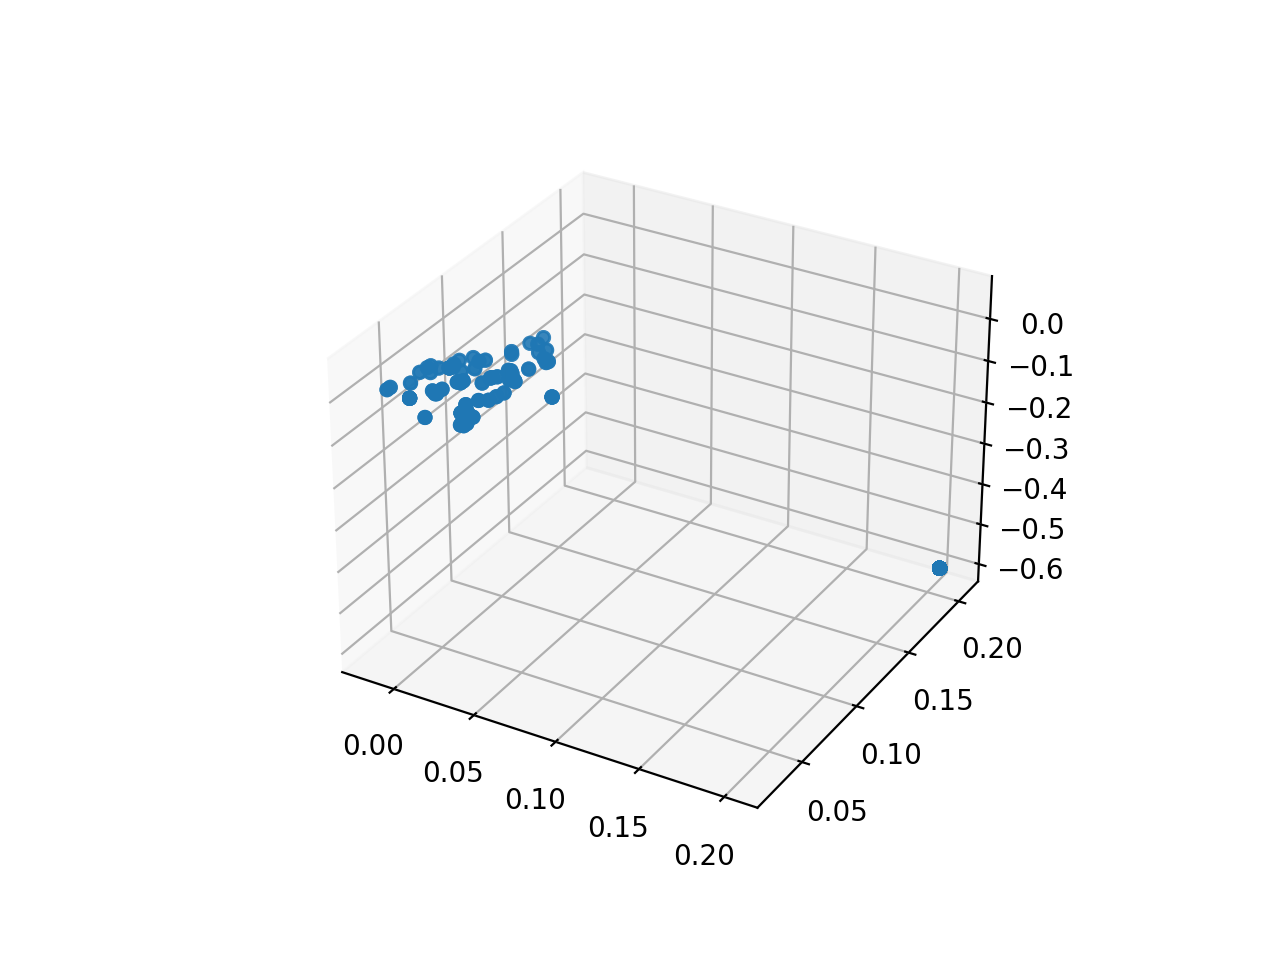

(32268, 3)

In [42]:
%matplotlib notebook

# Initial X
#     - Bunch of outliers

X_clean = nearestn(X = X, n_neighbor = n_neighbor, n_int = n_int, threshold = threshold_nn)
X_clean = kmeans(X = X_clean, k = k_kmeans, threshold = threshold_kmeans, ismean = ismean_kmeans)
X_clean = nearestn(X = X_clean, n_neighbor = n_neighbor, n_int = n_int, threshold = 0.002)
# X_clean = gaussian(X = X_clean, ismean = False, alpha = 0.1)
X_clean = kmeans(X = X_clean, k = 400, threshold = 20, ismean = False)
X_clean = nearestn(X = X_clean, n_neighbor = n_neighbor, n_int = n_int, threshold = 0.0001)


plot_3d(X_clean)

X.shape

In [16]:
with open('X_clean_array_4.pkl', 'wb') as handle:
    pkl.dump(X_clean, handle, protocol=pkl.HIGHEST_PROTOCOL)

